In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### load dataset and make passenger id as index_col

In [2]:
data=pd.read_csv(r'C:\Users\user\Desktop\titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### basic details of dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
data.shape

(891, 11)

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
data.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


### fill the missing values

In [8]:
data.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

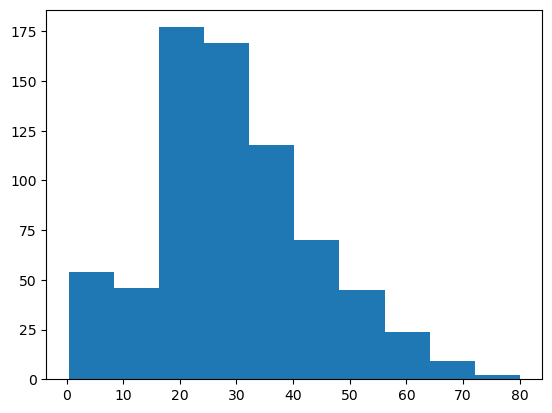

In [9]:
plt.hist(data['Age'])
plt.show()

In [10]:
data['Age']=data['Age'].fillna(data['Age']).median()

In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
data['Cabin']=data['Cabin'].fillna(data['Cabin']).mode()[0]

In [13]:
data['Embarked']=data['Embarked'].fillna(data['Embarked']).mode()[0]

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### check and handle outliers

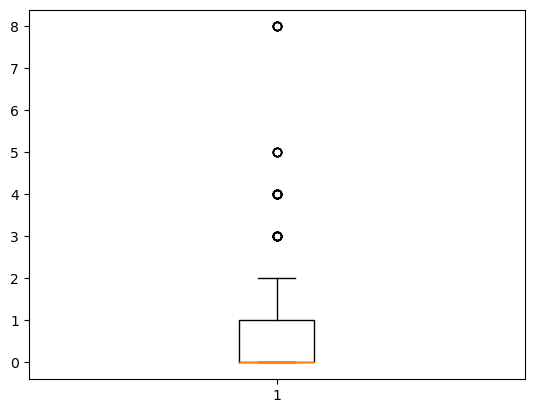

In [15]:
plt.boxplot(data['SibSp'])
plt.show()

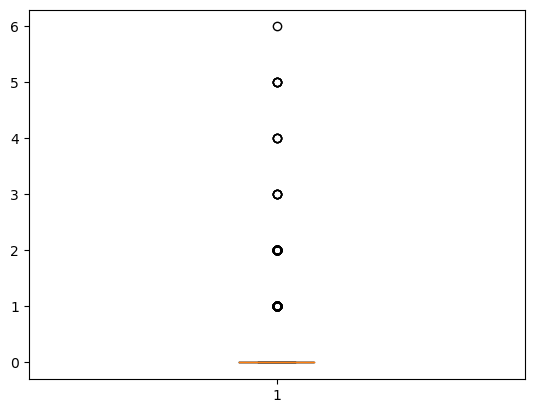

In [16]:
plt.boxplot(data['Parch'])
plt.show()

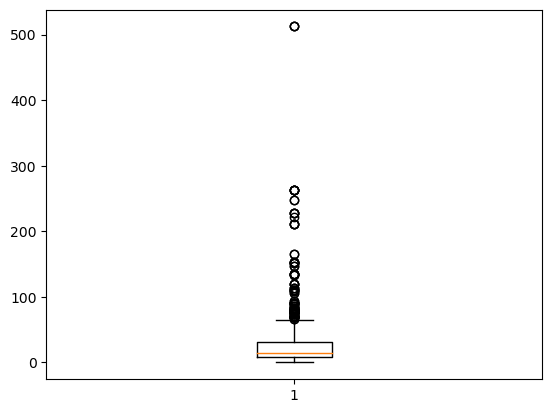

In [17]:
plt.boxplot(data['Fare'])
plt.show()

In [18]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [19]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [20]:
IQR=Q3-Q1

In [21]:
print(IQR)

1.0


In [22]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [23]:
print(low_limit)
print(up_limit)

-1.5
2.5


In [24]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,28.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28.0,1,0,PC 17599,71.2833,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,53.1000,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,28.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,28.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,28.0,0,0,112053,30.0000,B96 B98,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [25]:
outlier=[]
for x in data['SibSp']:
    if ((x>up_limit)|(x<low_limit)):
        outlier.append(x)

In [26]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [27]:
ind2=data['SibSp']>up_limit

In [28]:
data.loc[ind2].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [29]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

In [30]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,28.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28.0,1,0,PC 17599,71.2833,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,53.1000,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,28.0,0,0,373450,8.0500,B96 B98,S


In [31]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [32]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [33]:
IQR=Q3-Q1

In [34]:
print(IQR)

0.0


In [35]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [36]:
print(low_limit)
print(up_limit)

0.0
0.0


In [37]:
outlier=[]
for x in data['Parch']:
    if ((x>up_limit)|(x<low_limit)):
        outlier.append(x)

In [38]:
outlier

[2,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 2]

In [39]:
ind3=data['Parch']>up_limit

In [40]:
data.loc[ind3].index

Int64Index([  9,  11,  14,  26,  44,  55,  59,  66,  79,  87,
            ...
            854, 856, 857, 859, 870, 872, 880, 881, 886, 889],
           dtype='int64', name='PassengerId', length=169)

In [41]:
data.drop(data.loc[ind3].index,inplace=True)

In [42]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,28.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28.0,1,0,PC 17599,71.2833,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,53.1000,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,28.0,0,0,373450,8.0500,B96 B98,S


In [43]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [44]:
print(Q1)
print(Q2)
print(Q3)

7.8542
10.5
26.0


In [45]:
IQR=Q3-Q1

In [46]:
print(IQR)

18.1458


In [47]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [48]:
print(low_limit)
print(up_limit)

-19.364500000000003
53.2187


In [49]:
outlier=[]
for x in data['Fare']:
    if ((x>up_limit)|(x<low_limit)):
        outlier.append(x)

In [50]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 56.4958,
 61.175,
 73.5,
 79.2,
 66.6,
 56.4958,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 110.8833,
 108.9,
 56.9292,
 83.1583,
 135.6333,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 55.4417,
 135.6333,
 82.1708,
 227.525,
 73.5,
 113.275,
 90.0,
 55.9,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 86.5,
 108.9,
 56.4958,
 59.4,
 93.5,
 221.7792,
 106.425,
 106.425,
 227.525,
 55.9,
 78.2667,
 56.9292,
 153.4625,
 77.9583,
 69.3,
 56.4958,
 76.7292,
 73.5,
 133.65,
 73.5,
 76.7292,
 57.0,
 56.4958,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 86.5,
 77.9583,
 57.0,
 79.2,
 56.4958,
 80.0,
 56.4958,
 89.1042]

In [51]:
ind4=data['Fare']>up_limit

In [52]:
data.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [53]:
data.drop([  2,  32,  35,  53,  62,  63,  73,  75,  93, 121, 140, 152, 170,
            196, 216, 219, 225, 231, 246, 257, 258, 259, 270, 276, 291, 292,
            307, 308, 310, 311, 326, 335, 337, 338, 367, 370, 371, 374, 376,
            381, 386, 394, 413, 435, 454, 485, 487, 497, 505, 506, 510, 514,
            521, 528, 538, 545, 558, 578, 592, 600, 610, 628, 642, 644, 646,
            656, 661, 666, 682, 691, 693, 701, 709, 717, 731, 738, 742, 760,
            766, 782, 790, 827, 830, 839, 850],inplace=True)

In [54]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,28.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,53.1000,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,28.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,S


### min max scaling

In [55]:
Y=data['Survived']
X=data.drop(['Survived'],axis=1)

In [56]:
Y.head()

PassengerId
1    0
3    1
4    1
5    0
6    0
Name: Survived, dtype: int64

In [57]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,28.0,1,0,A/5 21171,7.2500,B96 B98,S
3,3,"Heikkinen, Miss. Laina",female,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28.0,1,0,113803,53.1000,B96 B98,S
5,3,"Allen, Mr. William Henry",male,28.0,0,0,373450,8.0500,B96 B98,S
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,S


In [58]:
X=X.drop('Name',axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,28.0,1,0,A/5 21171,7.2500,B96 B98,S
3,3,female,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,female,28.0,1,0,113803,53.1000,B96 B98,S
5,3,male,28.0,0,0,373450,8.0500,B96 B98,S
6,3,male,28.0,0,0,330877,8.4583,B96 B98,S


In [59]:
X=X.drop('Sex',axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,28.0,1,0,A/5 21171,7.2500,B96 B98,S
3,3,28.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,28.0,1,0,113803,53.1000,B96 B98,S
5,3,28.0,0,0,373450,8.0500,B96 B98,S
6,3,28.0,0,0,330877,8.4583,B96 B98,S


In [60]:
X=X.drop('Ticket',axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,
1,3,28.0,1,0,7.2500,B96 B98,S
3,3,28.0,0,0,7.9250,B96 B98,S
4,1,28.0,1,0,53.1000,B96 B98,S
5,3,28.0,0,0,8.0500,B96 B98,S
6,3,28.0,0,0,8.4583,B96 B98,S


In [61]:
X=X.drop('Cabin',axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,3,28.0,1,0,7.2500,S
3,3,28.0,0,0,7.9250,S
4,1,28.0,1,0,53.1000,S
5,3,28.0,0,0,8.0500,S
6,3,28.0,0,0,8.4583,S


In [62]:
X=X.drop('Embarked',axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,28.0,1,0,7.2500
3,3,28.0,0,0,7.9250
4,1,28.0,1,0,53.1000
5,3,28.0,0,0,8.0500
6,3,28.0,0,0,8.4583


In [63]:
X.dtypes

Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [64]:
X=X.astype({"Pclass":'float',"SibSp":'float',"Parch":'float'})

In [65]:
print(X.dtypes)

Pclass    float64
Age       float64
SibSp     float64
Parch     float64
Fare      float64
dtype: object


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
minmax=MinMaxScaler(feature_range=(0,1))

In [68]:
X1=minmax.fit_transform(X)

In [69]:
type(X1)

numpy.ndarray

In [70]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
x1=pd.DataFrame(X1,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [72]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,591.000000,591.0,591.000000,591.0,591.000000
mean,0.739425,0.0,0.090525,0.0,0.265479
std,0.372512,0.0,0.215528,0.0,0.201927
min,0.000000,0.0,0.000000,0.0,0.000000
25%,0.500000,0.0,0.000000,0.0,0.146422
50%,1.000000,0.0,0.000000,0.0,0.163136
75%,1.000000,0.0,0.000000,0.0,0.297552
max,1.000000,0.0,1.000000,0.0,1.000000
